In [123]:
import matplotlib.pyplot as plt
import numpy as np
from graspy.simulations import sbm
from numpy.random import normal, poisson
from scipy.stats import norm
import random
import itertools
from math import exp as ex
from math import log
import matplotlib.pyplot as plt

%matplotlib inline

In [124]:
def get_edge(com1,com2,nodesPerCom,perActive):
    activeEdge = int(perActive*nodesPerCom**2/2)
    indx = []
    
    if com1 > com2:
        com1,com2 = com2,com1
        
    node1 = range((com1-1)*nodesPerCom,com1*nodesPerCom)
    node2 = range((com2-1)*nodesPerCom,com2*nodesPerCom)
    
    for i in node1:
        for j in node2:
            if i != j:
                indx.append((i,j))
    
    indx = random.sample(indx,activeEdge)
    
    return indx

In [125]:
N = 300 #total nodes
k = 12 #community number
P = .25
dim = 2
totalSample = 200

phen1 = [80,120]
phen2 = [100,100]
activeCom1 = [(4,7)]
activeCom2 = [(2,4),(7,9)]
y1 = np.zeros(totalSample)
y2 = np.zeros(totalSample)
nodeFlags = np.zeros(k)

In [126]:
G = np.zeros((totalSample,N,N))
indx = []
indx_ = []

nodesPerCom = int(N/k)
n = [nodesPerCom]*k
p = [[0.2]*k]*k
wt = [[normal]*k]*k
wtargs = []

for (i,j) in activeCom1:
    if nodeFlags[i] == 0:
        indx = indx + get_edge(i,i,nodesPerCom,P)
        nodeFlags[i] = 1
        
    if nodeFlags[j] == 0:
        indx = indx + get_edge(j,j,nodesPerCom,P)
        nodeFlags[i] = 1
        
    indx = indx + get_edge(i,j,nodesPerCom,P)
    
for (i,j) in activeCom2:
    if nodeFlags[i] == 0:
        indx_ = indx_ + get_edge(i,i,nodesPerCom,P)
        nodeFlags[i] = 1
        
    if nodeFlags[j] == 0:
        indx_ = indx_ + get_edge(j,j,nodesPerCom,P)
        nodeFlags[i] = 1
        
    indx_ = indx_ + get_edge(i,j,nodesPerCom,P)
    
        
for i in range(0,k):
    wtargs.append([])
    for j in range(0,k):
        if i!=j:
            wtargs[i].append({'loc': 0.1, 'scale': 0.18})
        else:
            wtargs[i].append({'loc': 0.3, 'scale': 0.18})

for k_ in range(0,totalSample):
    G[k_,:,:] = sbm(n=n, p=p, wt=wt, wtargs=wtargs)

    if k_ < phen1[1]:
        y1[k_] = 1
        DiffEdge = norm.rvs(size=len(indx),loc=0.2,scale=0.18)
        for i in range(0,len(indx)):
            G[k_,int(indx[i][0]),int(indx[i][1])] = DiffEdge[i] 
            G[k_,int(indx[i][1]),int(indx[i][0])] = DiffEdge[i] 
    
    if k_ < phen2[1]:
        y2[k_] = 1
        DiffEdge = norm.rvs(size=len(indx_),loc=0.2,scale=0.18)
        for i in range(0,len(indx_)):
            G[k_,int(indx_[i][0]),int(indx_[i][1])] = DiffEdge[i] 
            G[k_,int(indx_[i][1]),int(indx_[i][0])] = DiffEdge[i] 


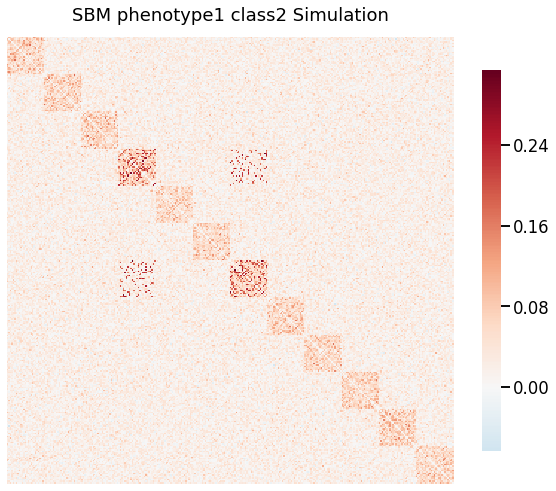

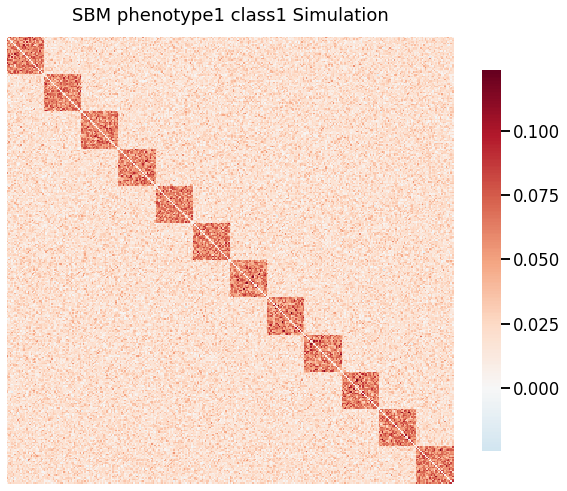

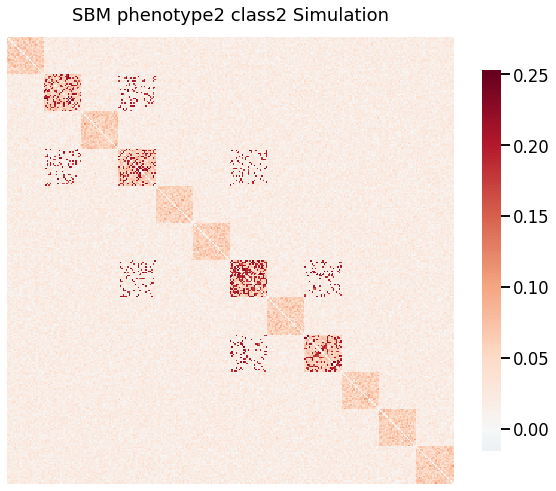

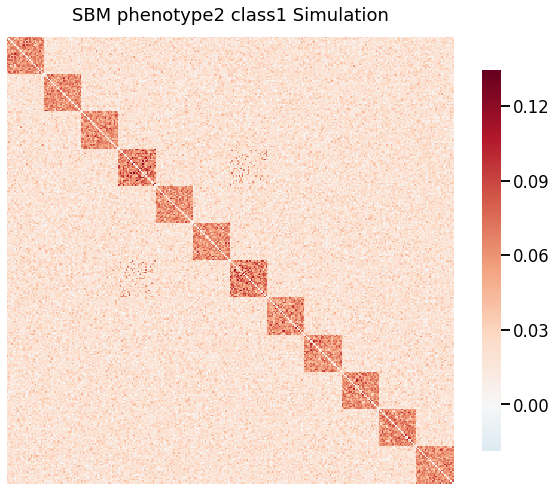

In [145]:
from graspy.plot import heatmap

heatmap(G[100:120,:].mean(axis = 0), title ='SBM phenotype1 class2 Simulation')
heatmap(G[120:200,:].mean(axis = 0), title ='SBM phenotype1 class1 Simulation')
heatmap(G[0:100,:].mean(axis = 0), title ='SBM phenotype2 class2 Simulation')
heatmap(G[100:200,:].mean(axis = 0), title ='SBM phenotype2 class1 Simulation')